# PCA Scree Plot + Loadings
This notebook loads the airline ticket dataset, computes passenger strength features, and generates a scree plot and loadings for PCA analysis.

In [1]:
import pandas as pd
from preprocess.visualization_utils import plot_scree
from preprocess.data_utils import import_unit_removed_dataset
import os
os.chdir("..")

In [2]:
# Load and prepare data
df = import_unit_removed_dataset()
df['city1_pax_strength'] = df.groupby(['Year', 'quarter', 'citymarketid_1'])['passengers'].transform('sum')
df['city2_pax_strength'] = df.groupby(['Year', 'quarter', 'citymarketid_2'])['passengers'].transform('sum')
df['rl_pax_str'] = abs(df['city1_pax_strength'] - df['city2_pax_strength'])
df['tot_pax_str'] = df['city1_pax_strength'] + df['city2_pax_strength']
feature_names = ['passengers', 'nsmiles', 'rl_pax_str', 'tot_pax_str', 'large_ms', 'lf_ms']
X = df[feature_names].dropna()
print(f'Dropped {len(df[feature_names]) - len(X)} rows with missing values')
print(f'len(X): {len(X)}')

Dropped 0 rows with missing values
len(X): 14004


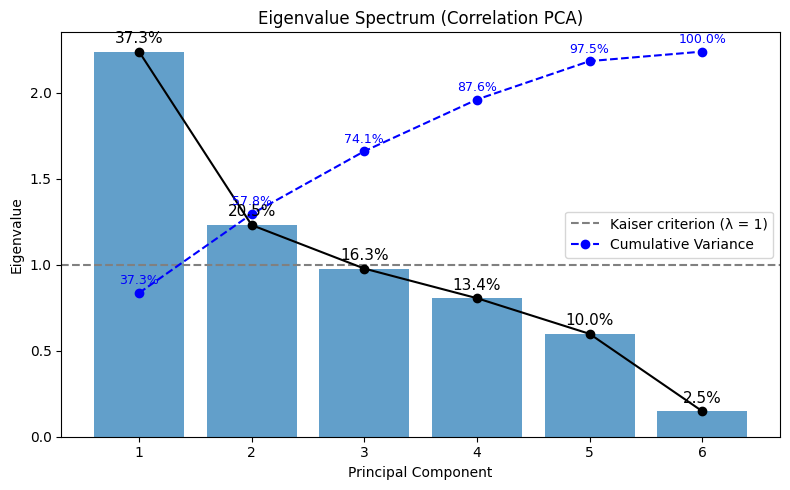

In [3]:
# Plot scree plot for PCA analysis
plot_scree(X, feature_names=feature_names)

In [4]:
# Standardize the data and fit PCA for 6 components
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=6)
pca.fit(X_scaled)

,n_components,6
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


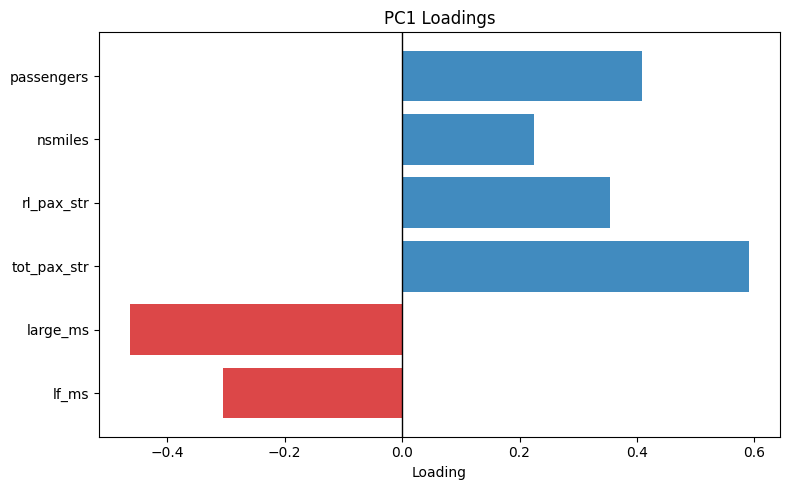

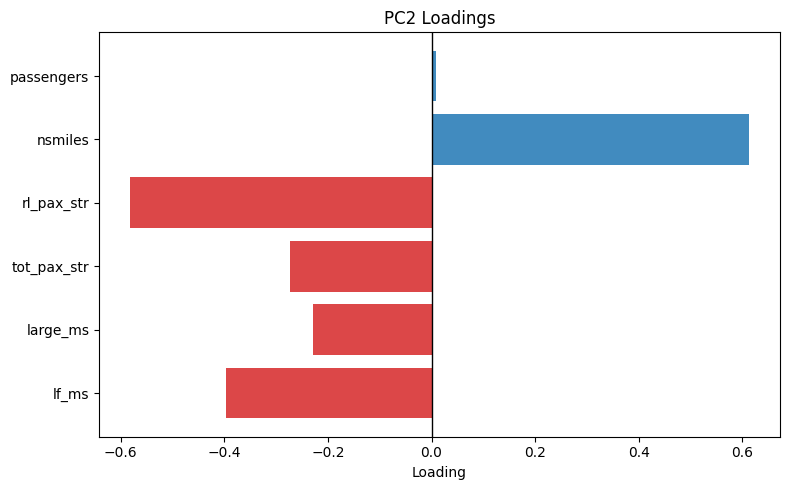

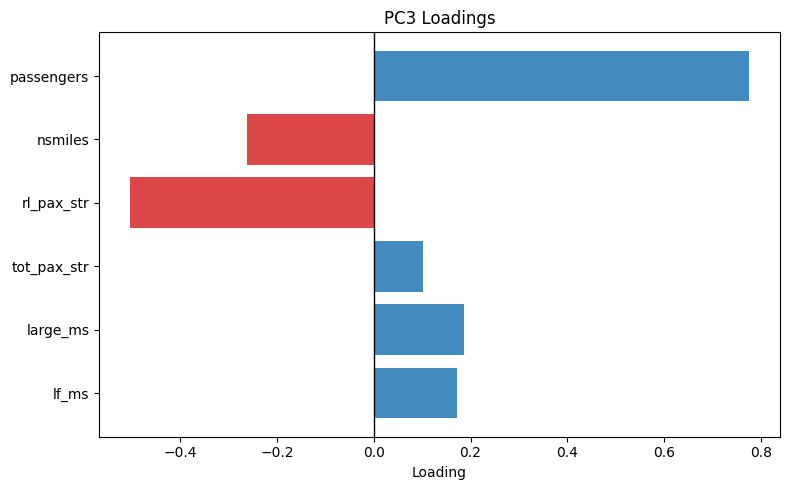

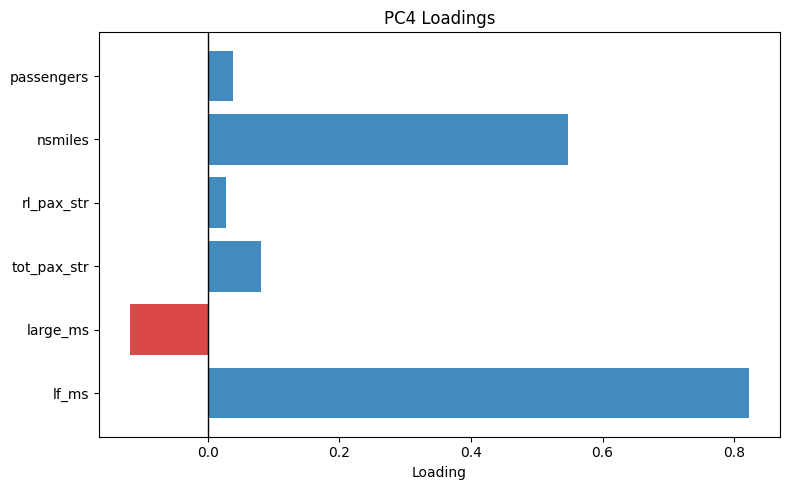

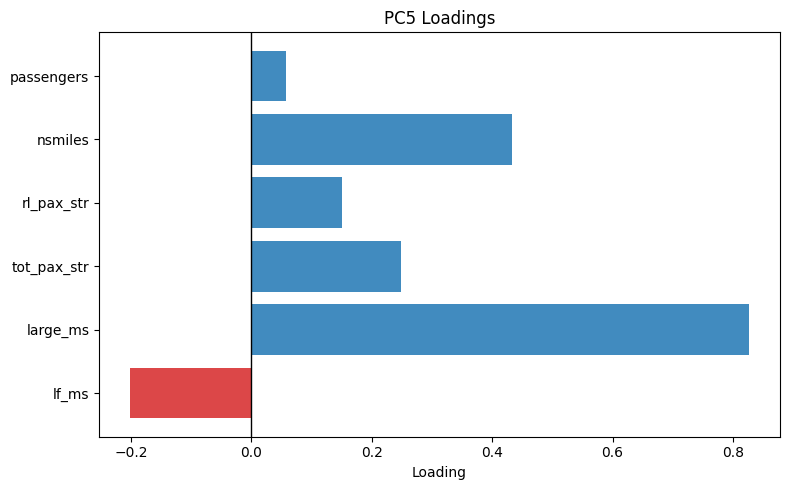

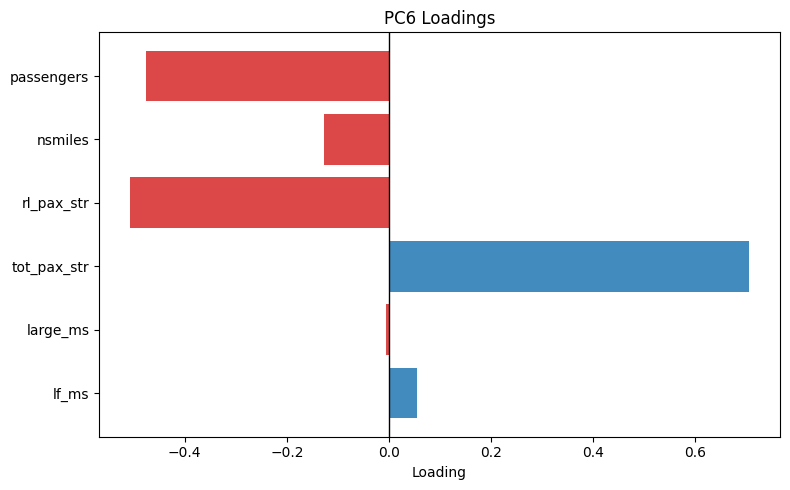

In [ ]:
# Plot loadings for each of the 6 principal components
from preprocess.visualization_utils import plot_pc_loadings
for i in range(6):
    plot_pc_loadings(
        pca,
        feature_names=feature_names,
        pc_index=i,
        title=f"PC{i+1} Loadings"
    )

# PC direction value plot


In [ ]:
# Add this cell after your existing cells
from preprocess.visualization_utils import plot_interactive_pca_scatter_full

# Prepare data with time index and color columns
df['time_index'] = df['Year'].astype(str) + ' Q' + df['quarter'].astype(str)

# Define features for PCA and columns for color coding
feature_names = ['passengers', 'nsmiles', 'rl_pax_str', 'tot_pax_str', 'large_ms', 'lf_ms']
color_columns = ['fare', 'fare_lg', 'fare_low', 'passengers', 'large_ms']

# Create interactive plot
fig = plot_interactive_pca_scatter_full(
    df=df,
    feature_names=feature_names,
    color_columns=color_columns,
    time_column='time_index',
    year_column='Year',
    pc_x=0,
    pc_y=1,
    n_ticks=8,  # for example
    title="PCA Route Embedding"
)
fig.show()

NameError: name 'df' is not defined